# Import Libraries

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import warnings
import plotly.express as px
from sklearn.metrics import silhouette_score

# Load Data

In [3]:
def load_data():
    df = pd.read_csv("data/Mall_Customers.csv")
    return df

In [14]:
df = load_data()

# Data Analysis

In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Preprocessing

In [20]:
# Drop CustomerID
df.drop('CustomerID', axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [22]:
# Check for null values
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Visualization

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

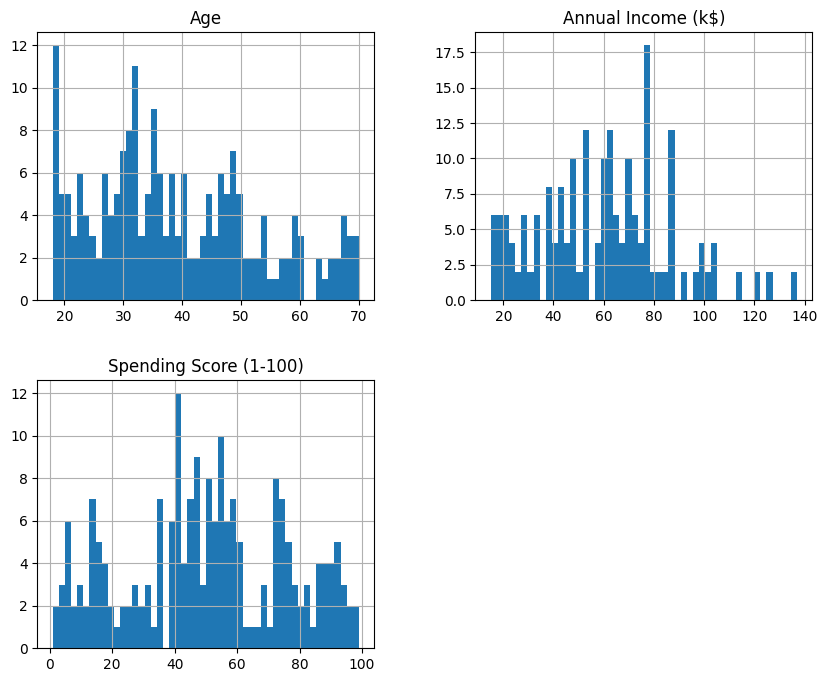

In [27]:
# Histogram
df.hist(figsize=(10,8), bins=50)

In [37]:
# Mean spending by gender
spendings_by_gender = df.groupby('Gender')['Spending Score (1-100)'].mean().reset_index()

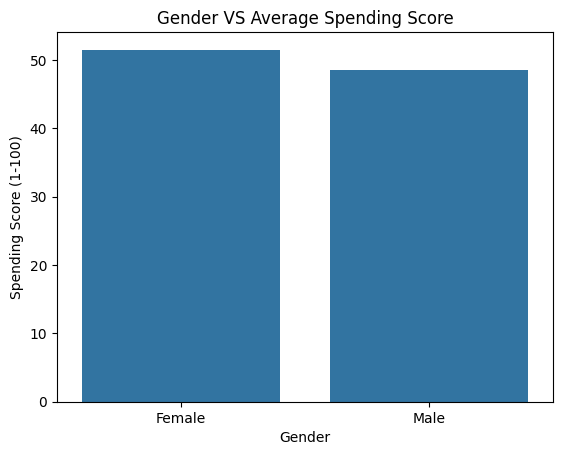

In [46]:
sns.barplot(x='Gender', y='Spending Score (1-100)', data=spendings_by_gender)
plt.title("Gender VS Average Spending Score")
plt.show()

This shows that the female spends more than male. 

In [52]:
# Mean earning by gender
earning_by_gender = df.groupby('Gender')['Annual Income (k$)'].mean().reset_index()

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

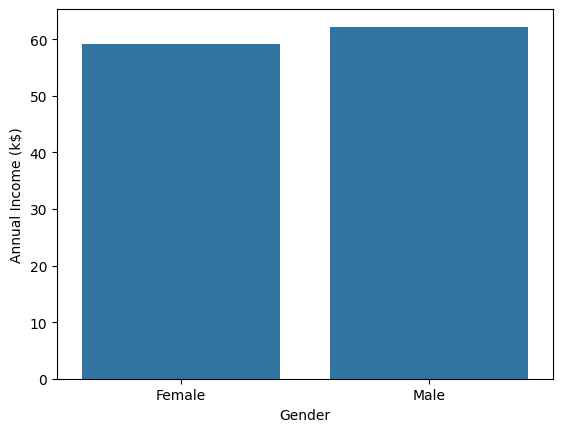

In [58]:
sns.barplot(data=earning_by_gender, x='Gender', y='Annual Income (k$)')

Male earns more than the female.

Comparing with above insight, we can say that though male earns more than female, they spend comparatively less money than the female. 

In [78]:
# What age group of people are our customers
age_group = df['Age'].value_counts().sort_values(ascending=False)
print(age_group)

Age
32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
50     5
21     5
48     5
29     5
20     5
34     5
24     4
18     4
28     4
67     4
59     4
54     4
37     3
68     3
46     3
25     3
22     3
60     3
33     3
39     3
45     3
43     3
41     2
65     2
58     2
51     2
70     2
63     2
42     2
53     2
26     2
57     2
66     2
44     2
52     2
55     1
69     1
64     1
56     1
Name: count, dtype: int64


In [77]:
min = df['Age'].min()
max = df['Age'].max()
print(min)
print(max)

18
70


Our customers are the people of age 18-70. 

The people of age 32 ad 35 are most active, the the activity decreases after 40 years. 

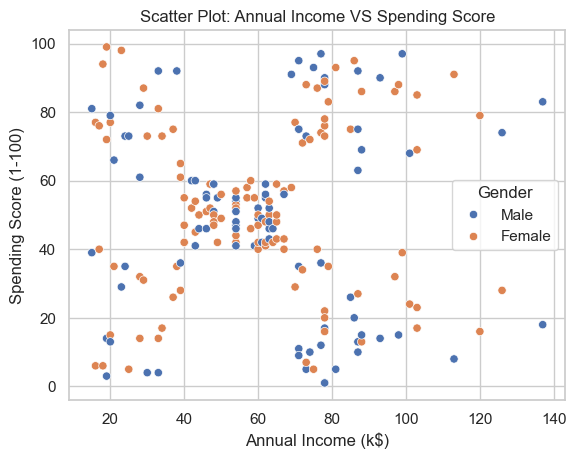

In [105]:
# Scatter plot 
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, palette='deep')

# Adding labels and title
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot: Annual Income VS Spending Score')

# Display the plot
plt.show()

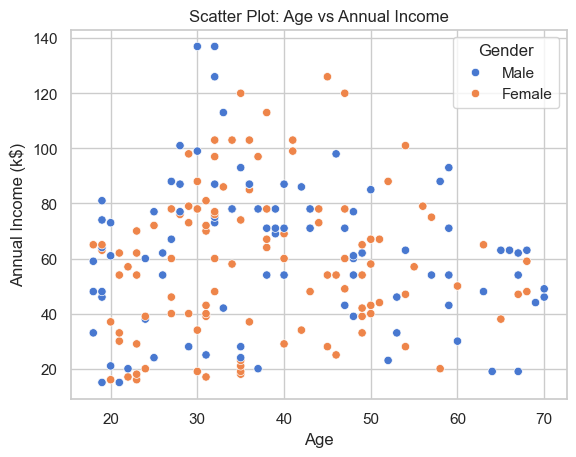

In [88]:
# Scatter plot 
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=df, palette='muted')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Scatter Plot: Age vs Annual Income')

# Display the plot
plt.show()

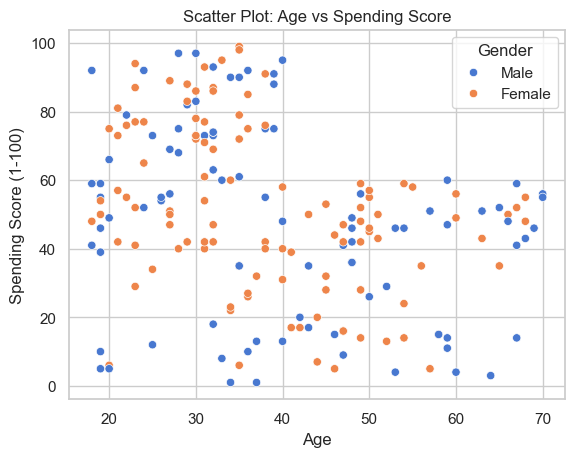

In [89]:
# Scatter plot 
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df, palette='muted')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot: Age vs Spending Score')

# Display the plot
plt.show()

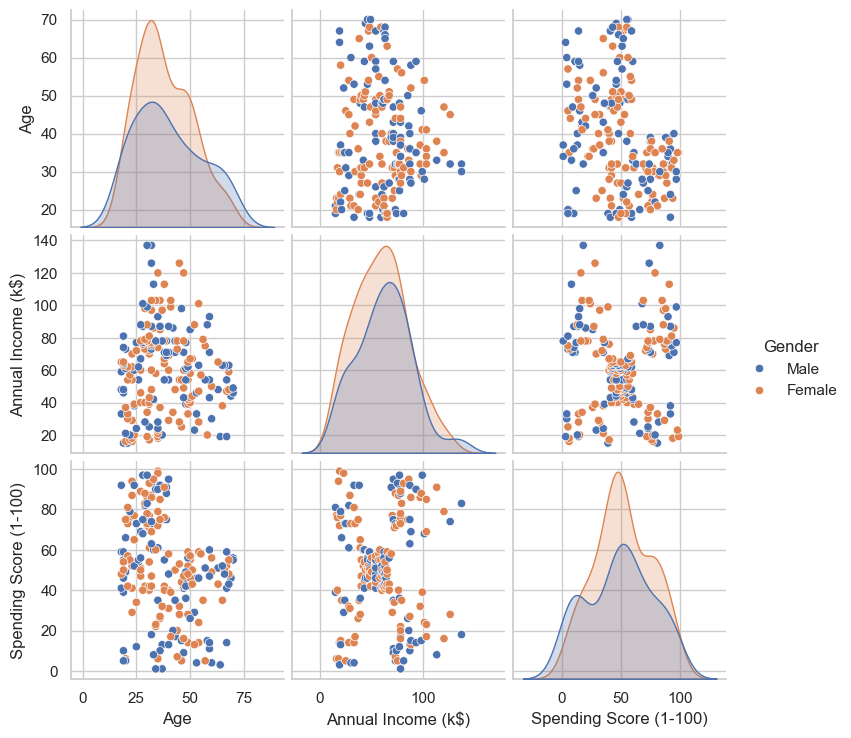

In [92]:
# Let's also see the pair plot 
sns.pairplot(df,hue='Gender')

# Clustering Using K-means

In [163]:
X = df.iloc[: , [2,3]]
print(f"X Shape {X.shape}")
X.head()

X Shape (200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [164]:
n_clusters = range(2 , 10)
inertia_errors = [] 
silhouette_scores = []
# Train model and calculate inertia, silhouette score for each cluster size
for k in n_clusters:
    model = KMeans(n_clusters= k , random_state= 42)
    # Train Model
    model.fit(X)
    # Calculate Inertia
    # Inertia: It quantifies how far the points within a cluster are from the centroid.
    inertia_errors.append(model.inertia_)
    # Calculate Silhouette Score
    # Measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
    silhouette_scores.append(silhouette_score(X , model.labels_))
print("Inertia:", inertia_errors)
print()
print("Silhouette Scores:", silhouette_scores)

Inertia: [181363.59595959593, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37233.814510710006, 30241.34361793659, 25036.41760403398, 21916.794789843727]

Silhouette Scores: [0.2968969162503008, 0.46761358158775435, 0.4931963109249047, 0.553931997444648, 0.53976103063432, 0.5288104473798049, 0.45481197931195283, 0.4561091950997367]


/opt/homebrew/Cellar/jupyterlab/4.0.6_1/libexec/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/Cellar/jupyterlab/4.0.6_1/libexec/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/Cellar/jupyterlab/4.0.6_1/libexec/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/Cellar/jupyterlab/4.0.6_1/libexec/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

The model with 5 clusters has the highest value of Silhouette Score i.e. 0.554. The inertia also falls significantly from from 2 to 5 clusters but later on drop in small amount. 

Analyzing the overall data of inertia and silhouette score, we can say 5 clusters would be a nice pick.

#### Elbow Plot

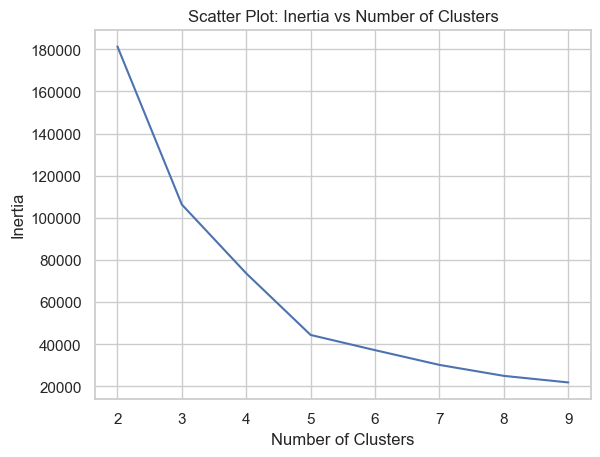

In [165]:
plt.plot(n_clusters, inertia_errors)
plt.title("Scatter Plot: Inertia vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

Seeing the elbow plot, going with 5 clusters seems like a good option.

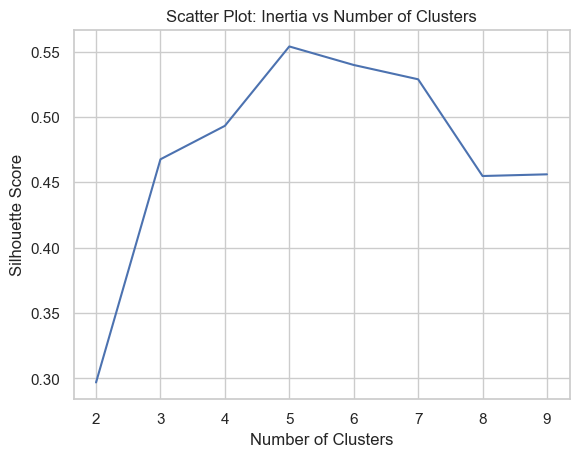

In [166]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
plt.plot(n_clusters, silhouette_scores)
plt.title("Scatter Plot: Inertia vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

So, 5 clusters is the best.

# Train the Model

In [175]:
model = KMeans(n_clusters=5 , random_state= 42, n_init=10)
model.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [174]:
labels = model.labels_
centroids = model.cluster_centers_
print(labels[:5])

[4 2 4 2 4]


### Scatter plot all the data highlighting their clusters and cluster centroid

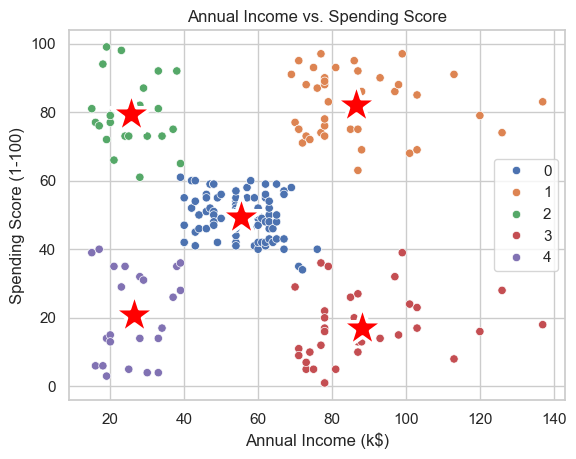

In [186]:
sns.scatterplot(x=df['Annual Income (k$)'] , y= df['Spending Score (1-100)'] ,
               hue=labels,
               palette='deep')
sns.scatterplot(
    x= centroids[:,0],
    y= centroids[: ,1],
    color= 'red',
    marker= '*',
    s= 1000
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs. Spending Score");
plt.show()

### Bar plot of Annual Income and Spending Score of each cluster

   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           86.538462               82.128205
2           25.727273               79.363636
3           88.200000               17.114286
4           26.304348               20.913043


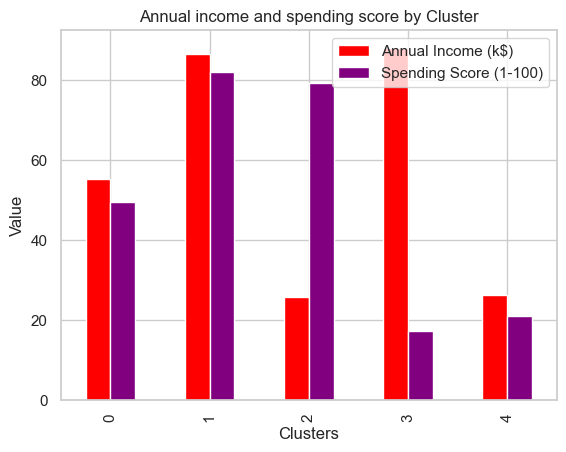

In [197]:
xgb = X.groupby(labels).mean()
print(xgb)
# Plotting using matplotlib
fig, ax = plt.subplots()
custom_palette = ['red', 'purple']
xgb.plot(kind='bar', ax=ax, color=custom_palette)

# Adding labels and title
ax.set_title("Annual income and spending score by Cluster")
ax.set_xlabel("Clusters")
ax.set_ylabel("Value")

# Show the plot
plt.show()